# Diabetes Health Indicators

## The Diabetes Health Indicators Dataset contains survey responses about individuals and their diabetes status. It includes survey responses related to health and lifestyle factors. It used to explore the risk factors associated with diabetes and provide accurate predictions of whether an individual has diabetes

In [3]:
!pip install pickle4

  Preparing metadata (setup.py) ... done
  Created wheel for pickle4: filename=pickle4-0.0.1-py2.py3-none-any.whl size=19699 sha256=b1f6c820269e76da3f0f22bd8a99b4f9002fed4fc64d6732c76ea3a0cdb9c1c7
  Stored in directory: /Users/macbookair/Library/Caches/pip/wheels/6b/d8/c3/ffeba120902a54139f1457d1fd2a089d3a39c21d1f579a601d
Successfully built pickle4


In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# importing the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Exploration and Understaning

In [95]:
#Exploring the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_binary_health_indicators_BRFSS2015.csv')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [96]:
# Getting the number of rows and colunms in the dataset
data.shape

(253680, 22)

In [97]:
# Extracting out the colunms in the dataset
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [98]:
# Getting the full details about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [99]:
 #Value count of variables in the dataset
for col in data.columns:
  print(f'{col}: {data[col].value_counts()}\n')

Diabetes_binary: Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

HighBP: HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

HighChol: HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

CholCheck: CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64

BMI: BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

Smoker: Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

Stroke: Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

HeartDiseaseorAttack: HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

PhysActivity: PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

Fruits: Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64

Veggies: Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64

HvyAlcoholConsump: HvyAlcoho

In [100]:
# Checking for the missing values
data.isnull().sum()*100 / len(data)

,0
Diabetes_binary,0.0
HighBP,0.0
HighChol,0.0
CholCheck,0.0
BMI,0.0
Smoker,0.0
Stroke,0.0
HeartDiseaseorAttack,0.0
PhysActivity,0.0
Fruits,0.0


In [101]:
# Checking for the duplicate rows
data.duplicated().sum()

24206

In [102]:
# To drop the duplicate rows
data. drop_duplicates(inplace=True)

In [103]:
# The columns description
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,229474.0,0.152945,0.359936,0.0,0.0,0.0,0.0,1.0
HighBP,229474.0,0.454343,0.497912,0.0,0.0,0.0,1.0,1.0
HighChol,229474.0,0.441640,0.496584,0.0,0.0,0.0,1.0,1.0
CholCheck,229474.0,0.959481,0.197173,0.0,1.0,1.0,1.0,1.0
BMI,229474.0,28.687507,6.789204,12.0,24.0,27.0,32.0,98.0
Smoker,229474.0,0.465800,0.498830,0.0,0.0,0.0,1.0,1.0
Stroke,229474.0,0.044816,0.206899,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229474.0,0.103336,0.304398,0.0,0.0,0.0,0.0,1.0
PhysActivity,229474.0,0.733042,0.442371,0.0,0.0,1.0,1.0,1.0
Fruits,229474.0,0.612675,0.487140,0.0,0.0,1.0,1.0,1.0


In [104]:
# Correlation table
data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


In [105]:
# Renaming the Diabetes_binary
data.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)


In [106]:
# Reindexing the columns
data.reindex(columns=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])
data.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [107]:
# Value count of variables in the dataset
outlier_columns = ['BMI', 'MentHlth', 'PhysHlth']
for col in outlier_columns:
  print(f'{col}: {data[col].value_counts()}\n')

BMI: BMI
27.0    21514
26.0    17775
24.0    16497
28.0    14914
25.0    14793
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

MentHlth: MentHlth
0.0     152325
2.0      12692
30.0     12079
5.0       8913
1.0       8307
3.0       7301
10.0      6352
15.0      5501
4.0       3774
20.0      3362
7.0       3090
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: count, dtype: int64

PhysHlth: PhysHlth
0.0     136578
30.0     19385
2.0      14491
1.0      11073
3.0       8435
5.0       7595
10.0      5588
15.0      4914
7.0       4531
4.0       4521
20.0      3273
14.0      2584
25.0      1336
6.0       1328
8.0        809
21.0       663
12.0       578
28.0       52

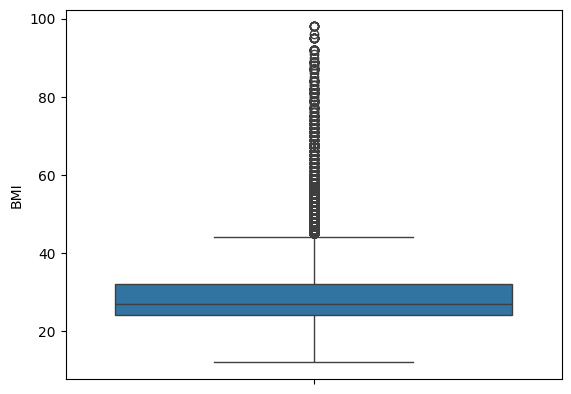

In [108]:
sns.boxplot(data['BMI'])
plt.show()

In [109]:
 # Remove outliers using Interquantile range
Q1 = data.BMI.quantile(0.25)
Q3 = data.BMI.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers =data[(data.BMI < lower) | (data.BMI > upper)]
outliers.shape

(5638, 22)

In [110]:
# Drop outliers from the BMI DataFrame
data = data.drop(outliers.index)
data.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


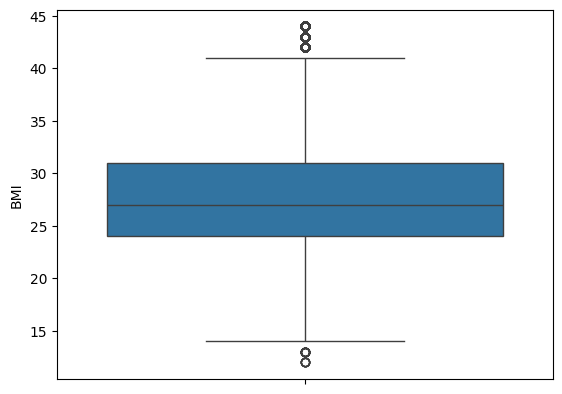

In [111]:
# to reconfirm the outliers
sns.boxplot(data['BMI'])
plt.show()

### This process helps to understand the data's structure;

Import necessary libraries for the project

The dataset is a csv file with Range Index: 253680 entries, 0 to 253679 Data columns (total 22 columns), dtypes: float64(22) , memory usage: 42.6 MB

There is no missing values

There are duplicates rows of 20246 and was handle

Identify  and handle outliers on BMI

Compute the correlation matrix to understand relationships between variables.



# Data visualisation and model selection



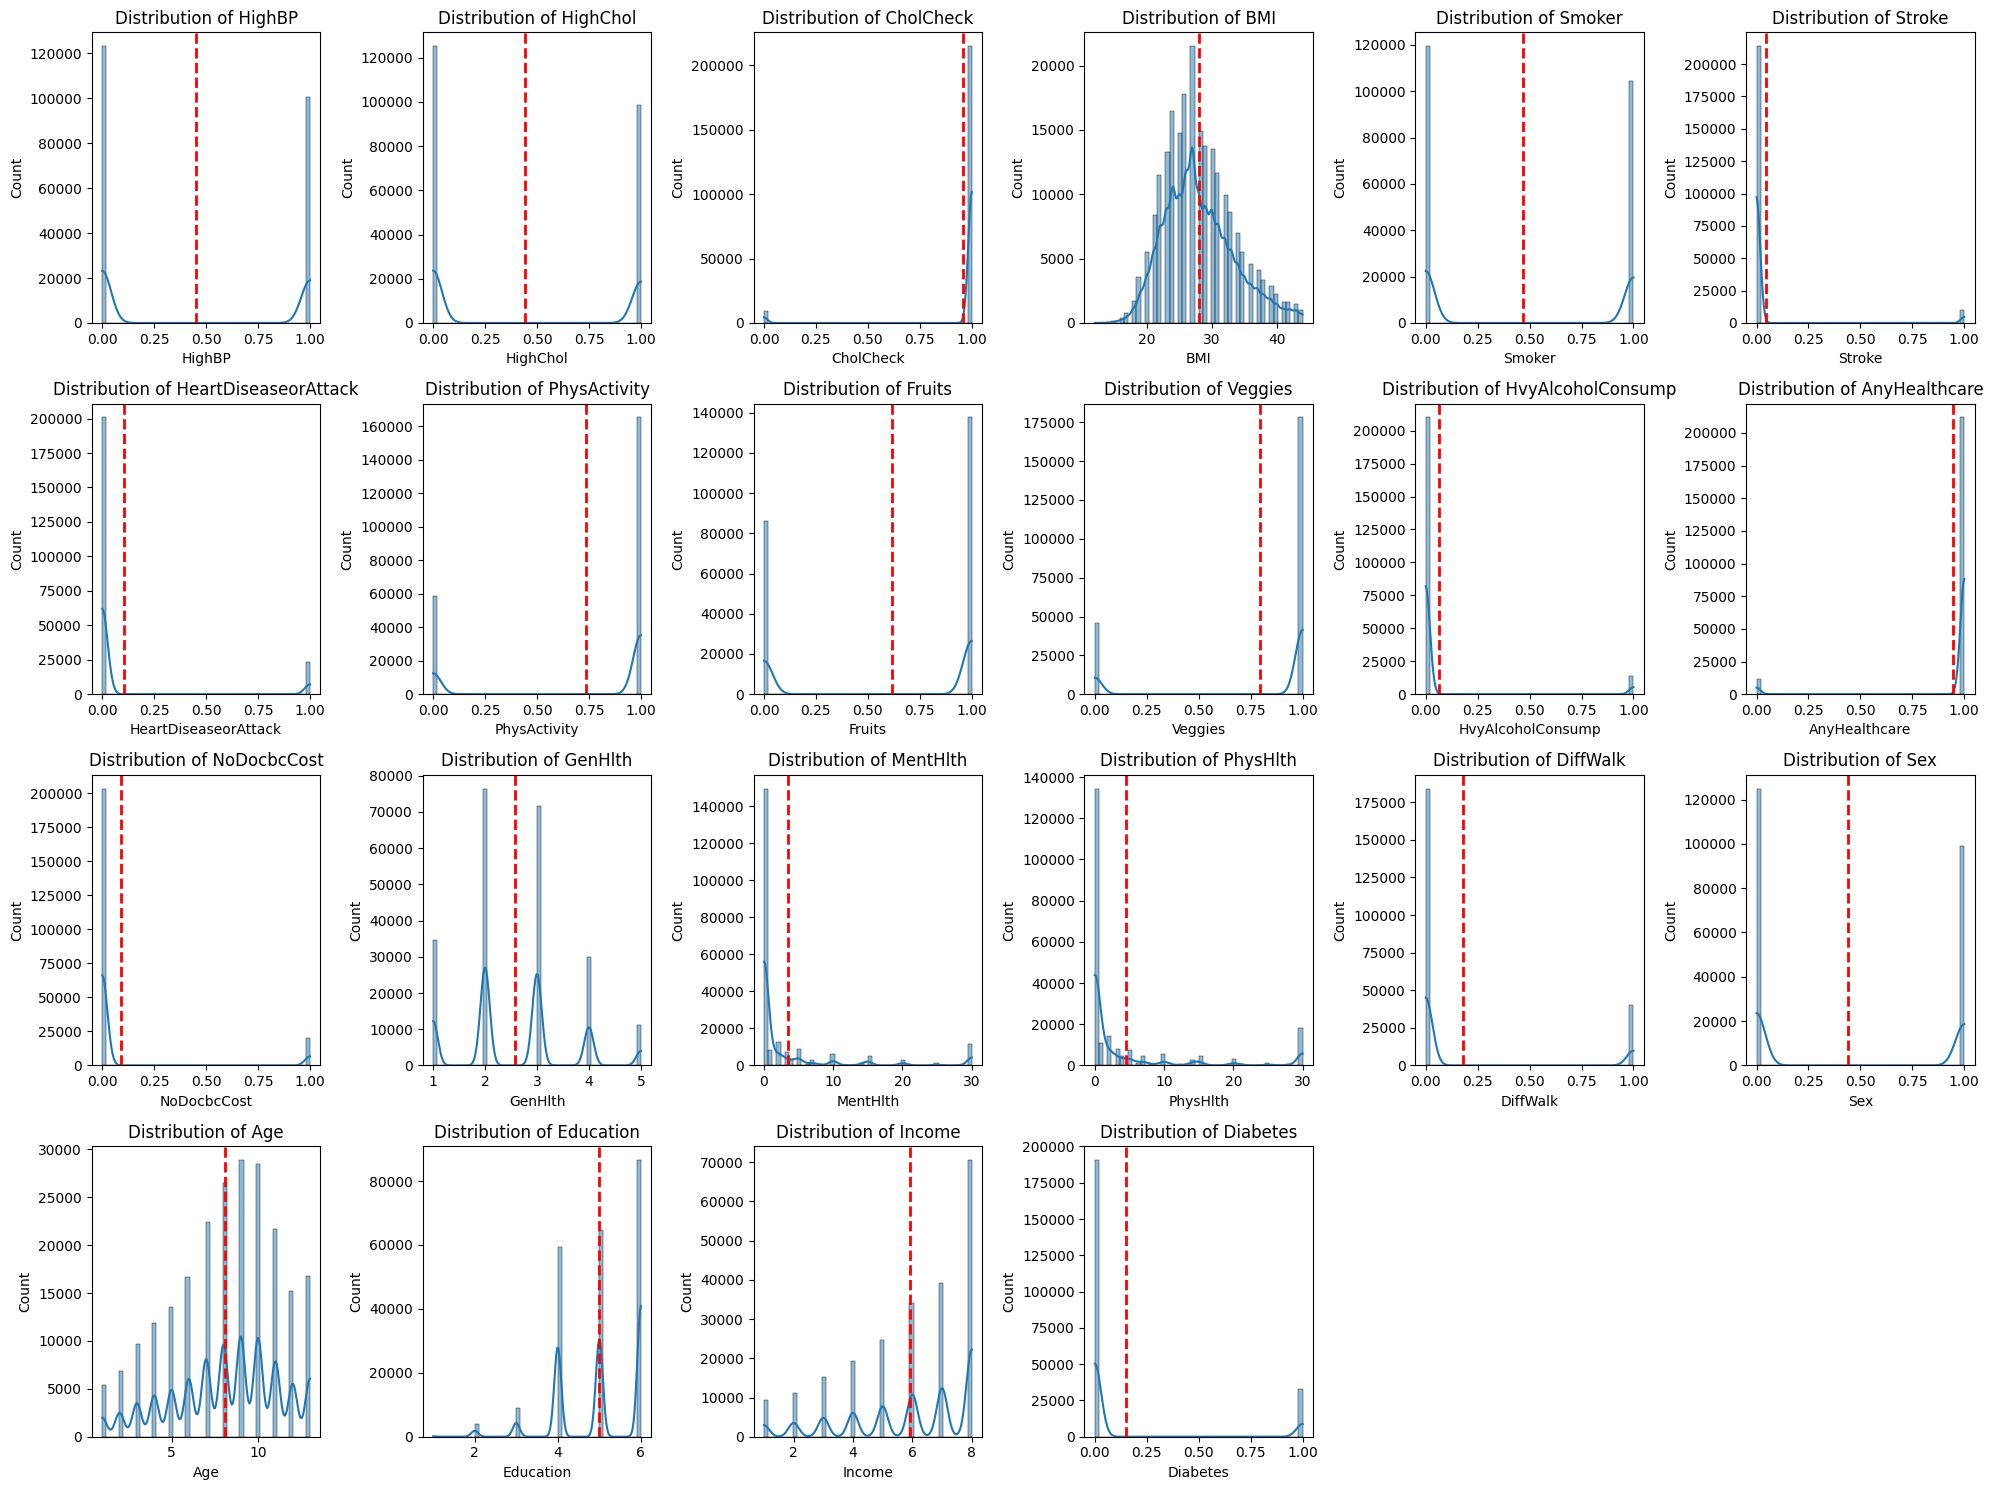

In [112]:
# Checking for distribution of each columns in the dataset
plt.figure(figsize=(20,15))

columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes']

for i, var in enumerate(columns, 1):
    plt.subplot(4, 6, i)
    sns.histplot(data[var], kde=True, bins=50)
    plt.axvline(data[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

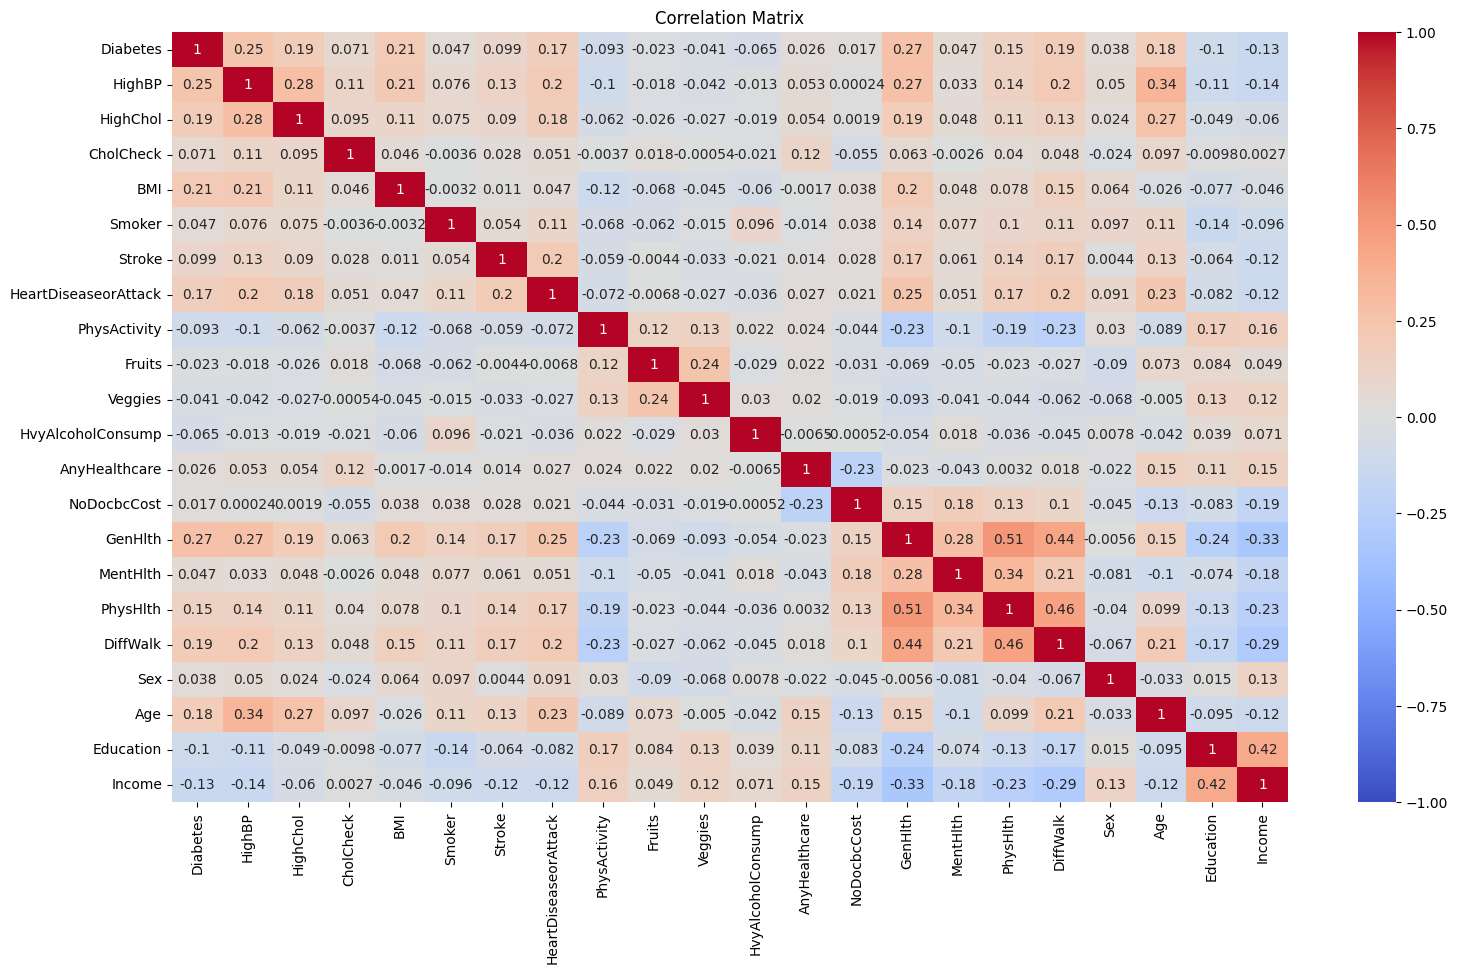

In [113]:
# Ploting the correlation matrix
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

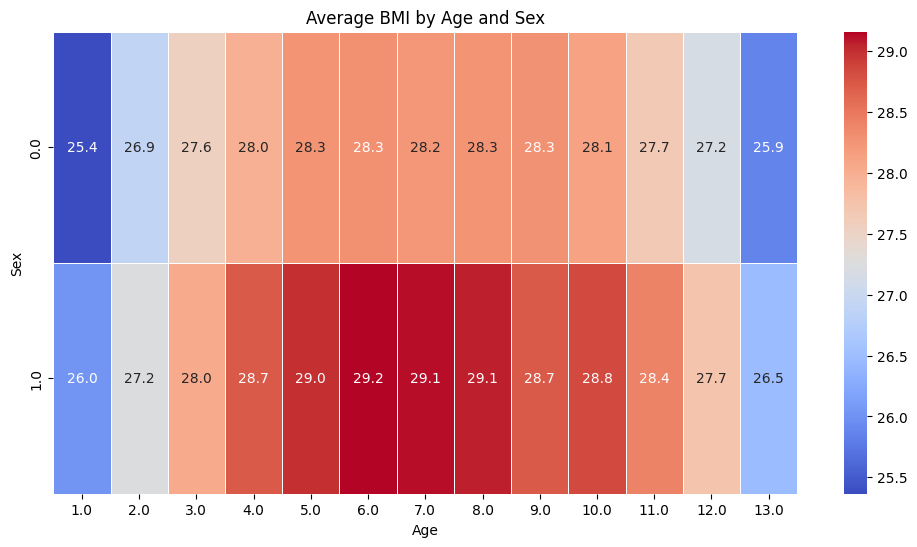

In [114]:
# Average BMI by Age and Gender
patient_data = data.groupby(['Age', 'Sex']).agg({'BMI': 'mean'}).reset_index()
patient_pivot = patient_data.pivot(index='Sex', columns='Age', values='BMI')
# create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(patient_pivot, annot=True, cmap='coolwarm', fmt='.1f',linewidths=0.5)
plt.title('Average BMI by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

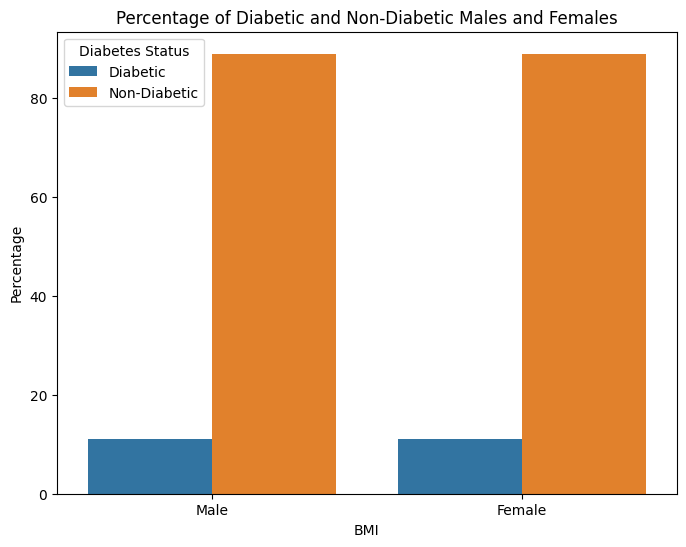

In [115]:
#Count diabetic and non-diabetic males and females
male_diabetic = data[(data['BMI'] >30) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['BMI'] < 30) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['BMI'] >30) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['BMI'] < 30) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'BMI': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('BMI')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='BMI', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('BMI')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

In [116]:
# Count of diabetes for all male
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

,0
Diabetes,16127
HighBP,16127
HighChol,16127
CholCheck,16127
BMI,16127
Smoker,16127
Stroke,16127
HeartDiseaseorAttack,16127
PhysActivity,16127
Fruits,16127


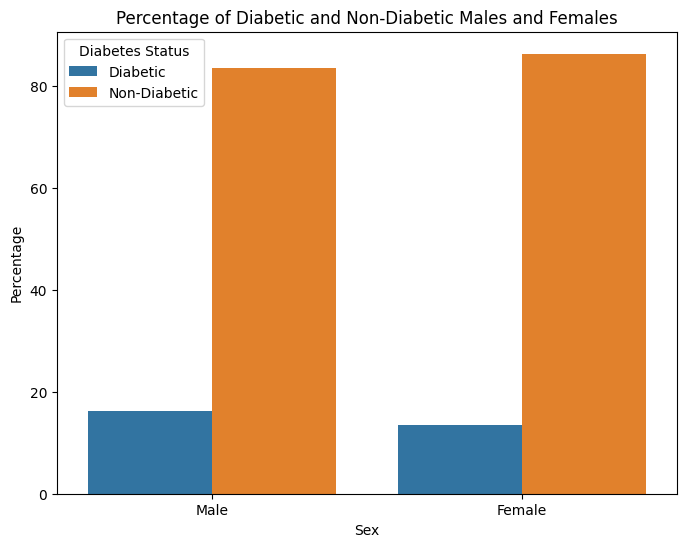

In [117]:
#Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

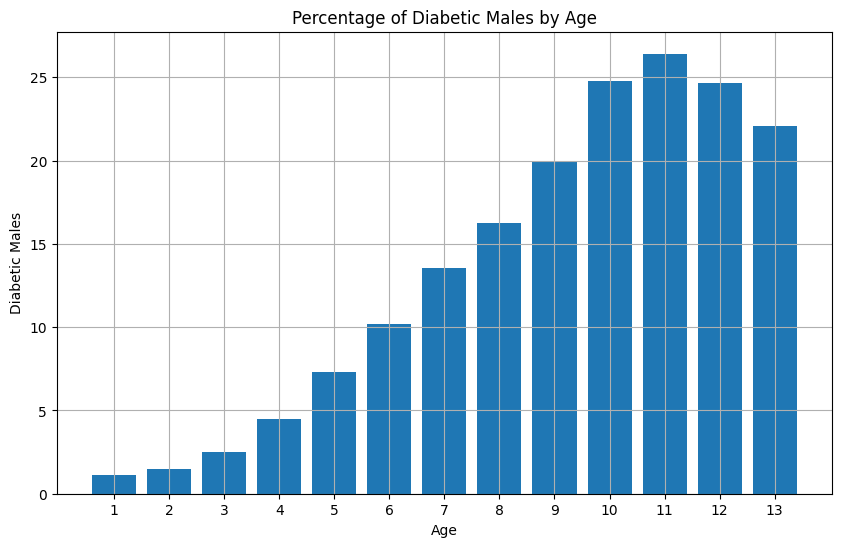

Maximum percentage of diabetic males is 26.42% at age 11.


In [118]:
# frequency of diabetics of all ages for male

data_male = data[data['Sex'] == 1]
male_diabetic = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic['Age'], male_diabetic['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Diabetic Males')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(male_diabetic['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic.loc[male_diabetic['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

In [119]:
# Count of diabetes for all female
data_female = data[(data['Sex'] == 0)&(data['Diabetes'] == 1)]
data_female.count()

,0
Diabetes,16974
HighBP,16974
HighChol,16974
CholCheck,16974
BMI,16974
Smoker,16974
Stroke,16974
HeartDiseaseorAttack,16974
PhysActivity,16974
Fruits,16974


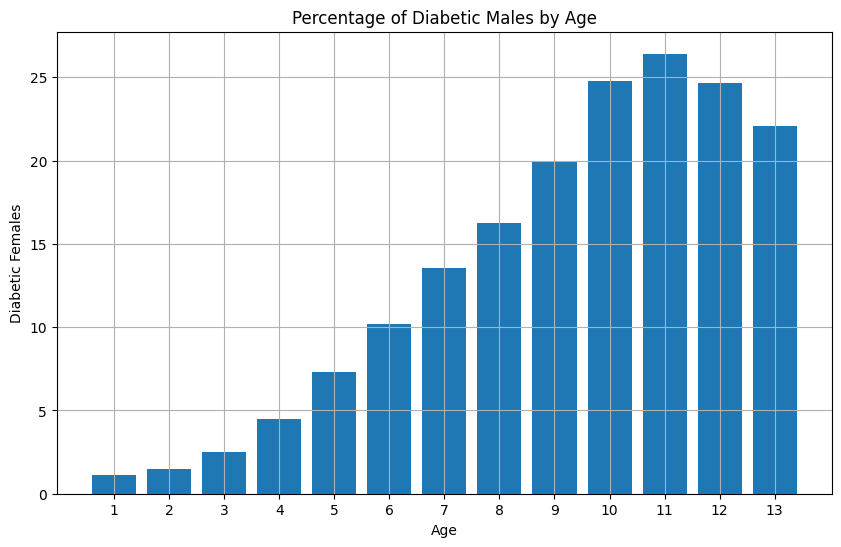

Maximum percentage of diabetic females is 26.42% at age 11.


In [120]:
# frequency of diabetics of all ages for female

data_female = data[data['Sex'] == 1]
female_diabetic = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic['Age'], female_diabetic['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Diabetic Females')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(female_diabetic['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic.loc[female_diabetic['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

In [121]:
# Percentage of Diabetics with Specific Characteristics (Variables).
data.corr()['Diabetes'].sort_values(ascending=False)*100

,Diabetes
Diabetes,100.000000
GenHlth,26.899229
HighBP,24.940821
BMI,21.050697
DiffWalk,19.307464
HighChol,19.162364
Age,18.064542
HeartDiseaseorAttack,16.777866
PhysHlth,14.672974
Stroke,9.896595


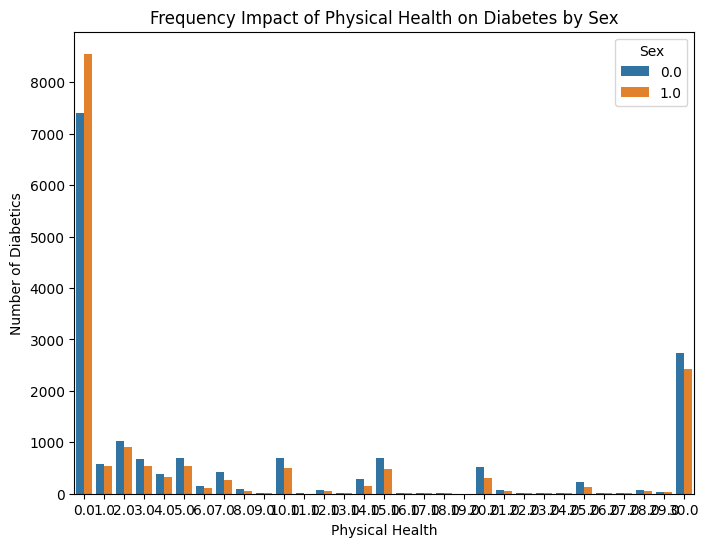

In [122]:
# physicalhlth :- which includes physical illness and injury, for how many days during the past 30
diabetic_by_sex_physhlth = data.groupby(['Sex', 'PhysHlth'])['Diabetes'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='PhysHlth', y='Diabetes', hue='Sex', data=diabetic_by_sex_physhlth)
plt.xlabel('Physical Health')
plt.ylabel('Number of Diabetics')
plt.title('Frequency Impact of Physical Health on Diabetes by Sex')
plt.show()


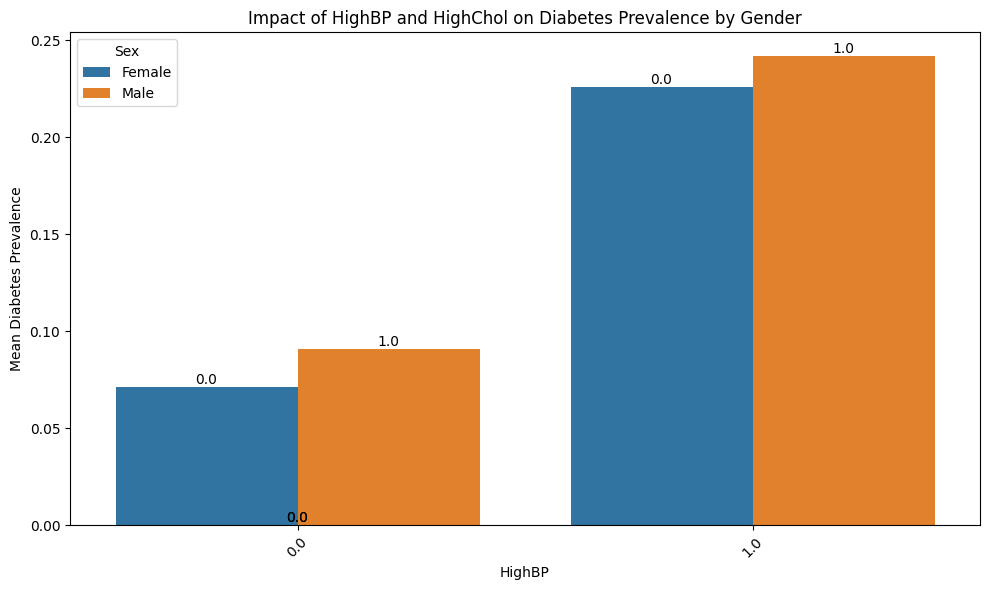

In [123]:
# Choose two features to analyze
feature1 = 'HighBP'
feature2 = 'HighChol'

# Group data by Sex, feature1, and feature2, then calculate mean Diabetes
grouped_data = data.groupby(['Sex', feature1, feature2])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature1, y='Diabetes', hue='Sex', data=grouped_data, ci=None)
plt.xlabel(feature1)
plt.ylabel('Mean Diabetes Prevalence')
plt.title(f'Impact of {feature1} and {feature2} on Diabetes Prevalence by Gender')

# Add annotations for feature2 values
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    group_idx = i // len(grouped_data[feature1].unique())
    feature2_value = grouped_data[feature2].unique()[group_idx % len(grouped_data[feature2].unique())]
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(feature2_value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 These visualizations provide valuable insights into the relationships between diabetes and various health indicators, helping to identify potential risk factors and inform further analysis.

Distribution Analysis: This helps understand the spread and central tendency of each variable.

Correlation Analysis: This helps identify potential predictors of diabetes.

BMI Analysis: A heatmap shows the average BMI by age and gender, revealing patterns in BMI across different demographics.

Diabetes Prevalence: Several bar plots analyze the prevalence of diabetes based on factors like BMI, gender, and age etc. These plots help understand how diabetes is distributed across different groups.



# Model training and testing.

In [124]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
#Divide dataframe into X- input features, y- target features
# Drop columns not needed for the mode
features = ['HighBP','HighChol','BMI','Stroke','HeartDiseaseorAttack',
            'PhysActivity','HvyAlcoholConsump','AnyHealthcare','GenHlth',
            'DiffWalk', 'Sex', 'Age']

x = data[features]
y = data['Diabetes']

In [126]:
# Split data into 80% Training & 20% Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [127]:
# Apply SMOTE to the training data to deal with imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [128]:
# Standardize data to avoid high variations in the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [129]:
model= RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [130]:
model_pred = model.predict(x_test)
cm = confusion_matrix(y_test, model_pred)
print(cm)
print(classification_report(y_test, model_pred))

[[36026  2151]
 [ 5253  1338]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     38177
         1.0       0.38      0.20      0.27      6591

    accuracy                           0.83     44768
   macro avg       0.63      0.57      0.59     44768
weighted avg       0.80      0.83      0.81     44768



In [131]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [132]:
knn_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_pred)
print(cm)
print(classification_report(y_test, knn_pred))

[[36079  2098]
 [ 5275  1316]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     38177
         1.0       0.39      0.20      0.26      6591

    accuracy                           0.84     44768
   macro avg       0.63      0.57      0.59     44768
weighted avg       0.80      0.84      0.81     44768



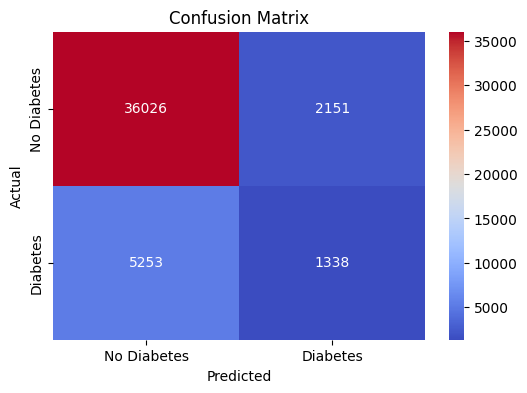

In [133]:
#Compute the confusion matrix
cm = confusion_matrix(y_test, model_pred) # calculate the confusion matrix

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes']) # pass cm to heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')#
plt.show()

#### This report summarizes the model training and testing process for predicting diabetes using the Diabetes Health Indicators dataset.

The Target variable, the Features selected and
Split into 80% training, 20% testing using.

Two models were chosen:
- Random Forest Classifier
- K-Nearest Neighbors Classifier
and models were trained using the training dataset.

Predictions were made on the testing data using each model.

Evaluation metrics:
Confusion matrix
Classification report (including precision, recall, F1-score, and accuracy)




# OUTPUT SUMMARY

Confusion Matrix:

True Negatives (TN): 36079

False Positives (FP): 2098

False Negatives (FN): 5275

True Positives (TP): 1316


F1-score: This is a balanced measure of precision and recall.
0.0 (No Diabetes): 0.91
1.0 (Diabetes): 0.26

Accuracy: Overall accuracy of the model (0.84)
Macro Avg: Average of precision, recall, and F1-score, not considering class imbalance.


The model has high accuracy and precision for the "No Diabetes" class, indicating good performance in identifying individuals without diabetes.However, it has low precision and recall for the "Diabetes" class.





In [134]:
import pickle

In [135]:
filename = "project_model.sav"
pickle.dump(knn, open(filename, "wb"))

In [136]:
# Load the saved model
loaded_model = pickle.load(open(filename, "rb"))


In [137]:
input_data = (0,1,22,1,0,0,1,1,5,1,0,13)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array so the model will understand I am making prediction for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("Non-Diabets")
else:
    print("Diabetes")

Non-Diabets
